In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt,seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
pd.__version__

'1.5.0'

# 1) LOAD THE DATA

In [3]:
data=pd.read_excel("Online Retail.xlsx")

# 2.UNDERSTAND THE DATA

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3) clean the data

In [8]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Handling the missing values in Description column

In [9]:
data["Description"].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
data["Description"].fillna(data["Description"].mode()[0],inplace=True)

In [12]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [13]:
(data.isnull().sum()/len(data))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

For dropping the customerID ROWS

In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
data.shape

(406829, 8)

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [19]:
data["Amount"]=round(data["UnitPrice"]*data["Quantity"],2)

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


# 4) Feature Engineering

In [22]:
monetarydata=data.groupby("CustomerID")["Amount"].sum().reset_index()

In [23]:
data.shape

(406829, 9)

In [24]:
monetarydata["Total Money"]=monetarydata["Amount"]

In [25]:
monetarydata=monetarydata.drop("Amount",axis=1)

In [26]:
monetarydata.head()

,CustomerID,Total Money
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [27]:
frequencydata=data.groupby("CustomerID")["InvoiceNo"].count().reset_index()

In [28]:
frequencydata["Transactions"]=frequencydata["InvoiceNo"]

In [29]:
frequencydata.drop("InvoiceNo",axis=1,inplace=True)

In [30]:
frequencydata.head()

,CustomerID,Transactions
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [31]:
frequencydata.min()

CustomerID      12346.0
Transactions        1.0
dtype: float64

In [32]:
monetary_freqdata=monetarydata.merge(frequencydata,how="inner",on="CustomerID")

In [33]:
monetary_freqdata.shape

(4372, 3)

In [34]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [35]:
data["recency"]=data["InvoiceDate"].max()-data["InvoiceDate"]

In [36]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [37]:
data["recency"]=data["recency"].dt.days

In [38]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [39]:
recency=data.groupby("CustomerID")["recency"].min()

In [40]:
recency

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: recency, Length: 4372, dtype: int64

In [41]:
new_data=monetary_freqdata.merge(recency,how="inner",on="CustomerID")

# Creating new features

In [42]:
new_data.head()

,CustomerID,Total Money,Transactions,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Data Visualizations 

Text(0.5, 1.0, 'Frequency vs Monetary')

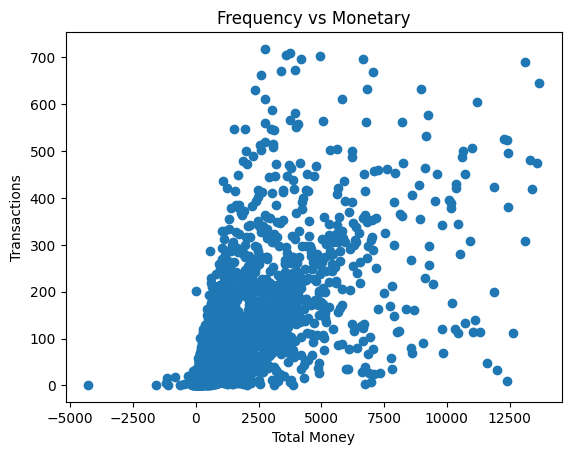

In [65]:
plt.scatter(x="Total Money",y="Transactions",data=new_data)
plt.xlabel("Total Money")
plt.ylabel("Transactions")
plt.title("Frequency vs Monetary")

Text(0.5, 1.0, 'Recency vs Frequency')

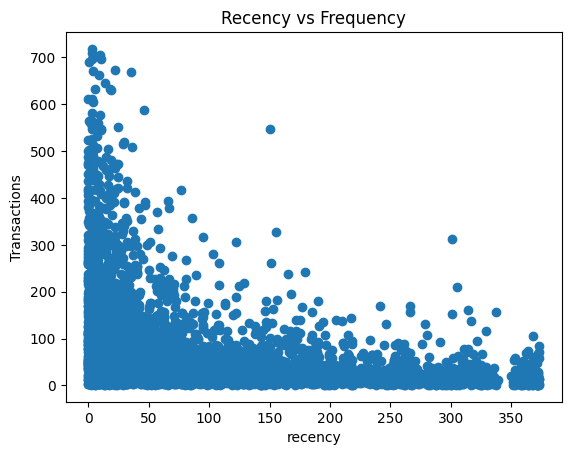

In [67]:
plt.scatter(x="recency",y="Transactions",data=new_data)
plt.xlabel("recency")
plt.ylabel("Transactions")
plt.title("Recency vs Frequency")

Text(0.5, 1.0, 'Monetary vs Frequency')

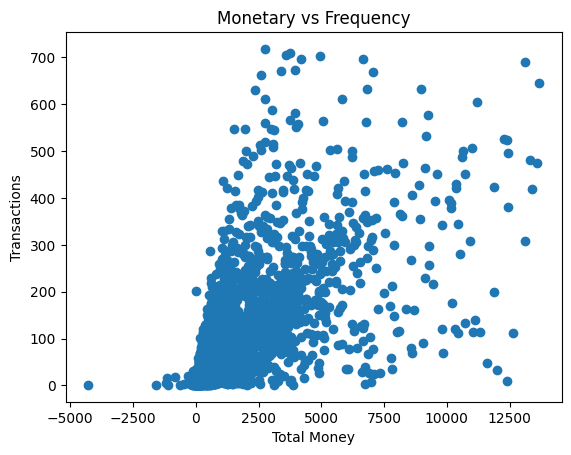

In [68]:
plt.scatter(x="Total Money",y="Transactions",data=new_data)
plt.xlabel("Total Money")
plt.ylabel("Transactions")
plt.title("Monetary vs Frequency")

# Identifying outliers

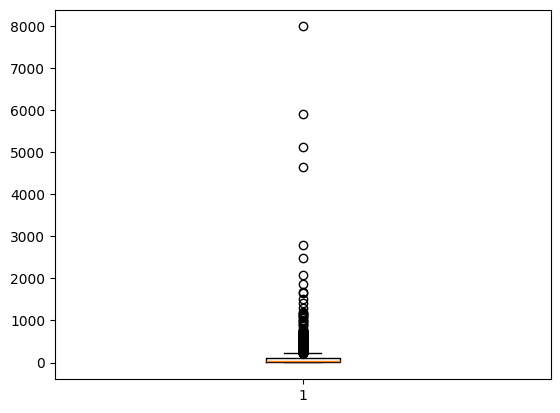

In [43]:
plt.boxplot(new_data["Transactions"])
plt.show()

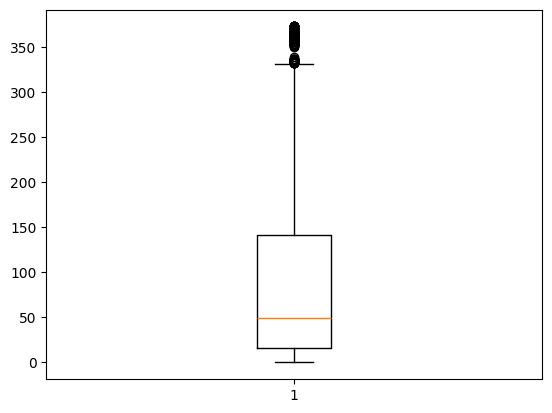

In [44]:
plt.boxplot(new_data["recency"])
plt.show()

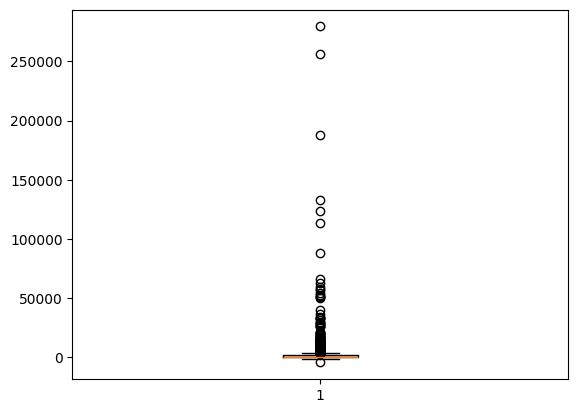

In [45]:
plt.boxplot(new_data["Total Money"])
plt.show()

Treating outliers by using IQR

In [46]:
Q1 = new_data["Total Money"].quantile(0.05)
Q3 = new_data["Total Money"].quantile(0.95)
IQR = Q3 - Q1
new_data = new_data[(new_data["Total Money"]>= Q1 - 1.5*IQR) & (new_data["Total Money"]<= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = new_data.recency.quantile(0.05)
Q3 = new_data.recency.quantile(0.95)
IQR = Q3 - Q1
new_data = new_data[(new_data.recency >= Q1 - 1.5*IQR) & (new_data.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = new_data.Transactions.quantile(0.05)
Q3 = new_data.Transactions.quantile(0.95)
IQR = Q3 - Q1
new_data = new_data[(new_data.Transactions >= Q1 - 1.5*IQR) & (new_data.Transactions <= Q3 + 1.5*IQR)]

In [47]:
rfm_df = new_data[['Total Money', 'Transactions', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [48]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Total Money', 'Transactions', 'recency']
rfm_df_scaled.head()

,Total Money,Transactions,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# K means modeling with 2 clusters

In [49]:
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=2, random_state=0)

In [50]:
kmeans.cluster_centers_

array([[-0.31289979, -0.31993331,  0.12246217],
       [ 1.76647918,  1.80618697, -0.69136149]])

In [51]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [52]:
kmeans.inertia_

7661.8718379116535

# Elbow method for optimal clusters

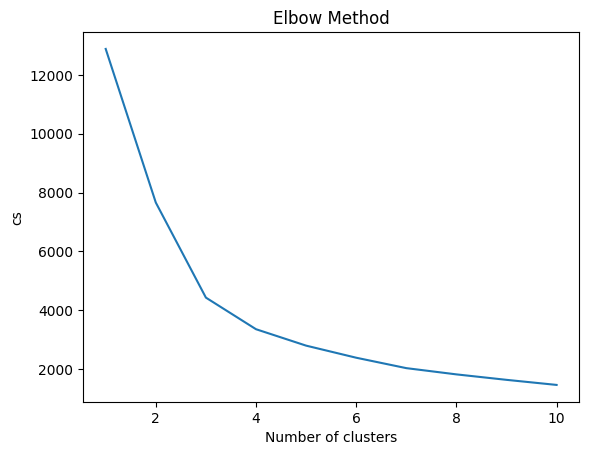

In [53]:
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(rfm_df_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.xlabel("Number of clusters")
plt.title("Elbow Method")
plt.ylabel("cs")
plt.show()

optimal no of clusters is 3 by the elbow method

In [54]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3, random_state=0)

In [55]:
kmeans.inertia_

4433.580618152636

In [56]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [57]:
new_data["clusters"]=kmeans.labels_

In [58]:
new_data

,CustomerID,Total Money,Transactions,recency,clusters
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


<Axes: xlabel='clusters', ylabel='Total Money'>

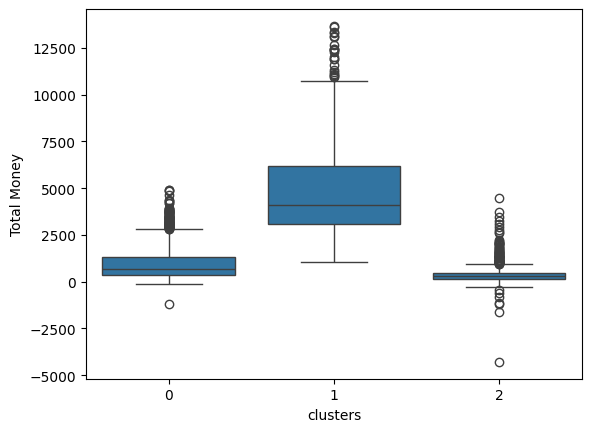

In [59]:
sns.boxplot(x="clusters",y="Total Money",data=new_data)

<Axes: xlabel='clusters', ylabel='recency'>

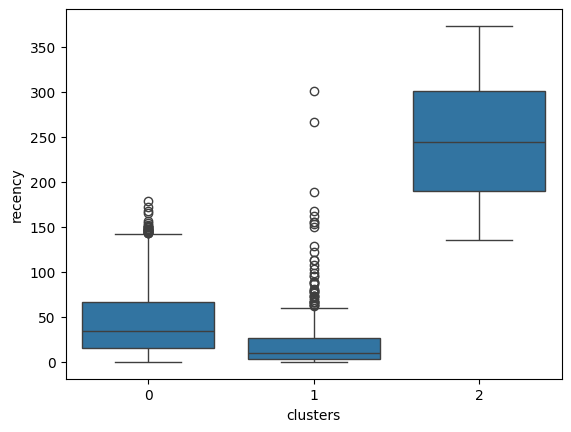

In [60]:
sns.boxplot(x="clusters",y="recency",data=new_data)

<Axes: xlabel='clusters', ylabel='Transactions'>

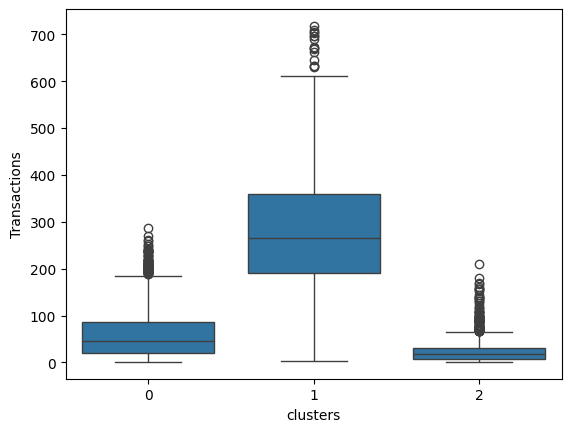

In [61]:
sns.boxplot(x="clusters",y="Transactions",data=new_data)